In [1]:
def warn(*args, **lwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (StandardScaler, OneHotEncoder)
from sklearn.impute import SimpleImputer
from sklearn.model_selection import (GridSearchCV, cross_val_score)
from sklearn import metrics
from joblib import dump, load
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.neighbors import (NearestNeighbors, NeighborhoodComponentsAnalysis)
from sklearn import svm

In [2]:
# Windows
ROOT = "C:/Users/weiru/OneDrive - University of Leeds/MSc-Lab/datasets"

In [3]:
dataPath = ROOT + "/files/dataset1PTHuse1_400.csv"

In [4]:
df = pd.read_csv(dataPath)

In [5]:
df

,Patient,PTH,Ca,Vit D,Mg,eGFR,Interpretation
0,1,1.1,1.90,72.0,0.1,80,A1
1,2,15.4,2.85,90.0,0.9,66,I
2,3,0.7,1.70,89.0,1.0,90,A2
3,4,2.3,1.90,60.0,0.1,80,B1
4,5,12.2,1.70,32.0,1.0,90,C1
...,...,...,...,...,...,...,...
395,396,15.4,2.85,90.0,0.9,66,I
396,397,0.7,1.70,89.0,1.0,90,A2
397,398,2.3,1.90,60.0,0.1,80,B1
398,399,12.2,1.70,32.0,1.0,90,C1


In [6]:
# Delete Patitent column

df = df.drop(columns=['Patient']).copy()

In [7]:
df

,PTH,Ca,Vit D,Mg,eGFR,Interpretation
0,1.1,1.90,72.0,0.1,80,A1
1,15.4,2.85,90.0,0.9,66,I
2,0.7,1.70,89.0,1.0,90,A2
3,2.3,1.90,60.0,0.1,80,B1
4,12.2,1.70,32.0,1.0,90,C1
...,...,...,...,...,...,...
395,15.4,2.85,90.0,0.9,66,I
396,0.7,1.70,89.0,1.0,90,A2
397,2.3,1.90,60.0,0.1,80,B1
398,12.2,1.70,32.0,1.0,90,C1


In [8]:
class SupportVectorMachine():
    
    def __init__(self):
        pass
        
    def removeNull(self, df):
        nonNull_df = df.copy()
        nonNull_df = nonNull_df.dropna(how='any',axis=0)
        return nonNull_df 
    
    def imputedDF(self, df, strategy):
        
        fill_NaN           = SimpleImputer(strategy=strategy)
        df_attr            = df.iloc[:,:-1]

        imputed_DF         = pd.DataFrame(fill_NaN.fit_transform(df_attr))
        imputed_DF.columns = df_attr.columns
        imputed_DF.index   = df_attr.index

        new_df             = imputed_DF.join(df.iloc[:,-1])

        return new_df
    
    
    
    def normalizedDF(self, df):
        normalized            = MinMaxScaler()
        df_attr               = df.iloc[:,:-1]
        normalized_DF         = pd.DataFrame(normalized.fit_transform(df_attr))
        normalized_DF.columns = df_attr.columns
        normalized_DF.index   = df_attr.index
        new_df                = normalized_DF.join(df.iloc[:,-1])
        return new_df
    
    
    
    def standardDF(self, df):
        std_scale      = StandardScaler()
        df_attr        = df.iloc[:,:-1]
        std_DF         = pd.DataFrame(std_scale.fit_transform(df_attr))
        std_DF.columns = df_attr.columns
        std_DF.index   = df_attr.index
        new_df         = std_DF.join(df.iloc[:,-1])
        return new_df
    
    
    
    def checkIsNull(self, df):
        '''
            Check whether the dataframe has nulls
        '''
        if df.isnull().values.any():
            print("Data have nulls")
        else:
            print("Data don't have nulls")
        
        
        
    def pipe(self, CA=""):
        
        RANDOM_STATE = 42
        svc          = SVC()
        pca          = PCA(random_state=RANDOM_STATE)
        lda          = LinearDiscriminantAnalysis()
        
        svc_pipe     = Pipeline([('svc', svc)])
        pca_pipe     = Pipeline([('pca', pca), ('svc', svc)])
        lda_pipe     = Pipeline([('lda', lda), ('svc', svc)])
        
        if CA == 'pca':
            return pca_pipe
        if CA == 'lda':
            return lda_pipe
        
        return svc_pipe
    
    
    
    def trainAndTarg(self, df):
    
        attri  = df.iloc[:,:-1]
        target = df.iloc[:, -1]

        return attri,target
    
    
    
    def print_best_param(self, clf_fit):
        print('Best score : ', clf_fit.best_score_)
        print('Best parameters', clf_fit.best_params_)
        
        
    
    def search__best_param(self, df, pipe, kernel, max_iter, p=False):
        grid_params = {
            'svc__C'                        : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'svc__kernel'                   : [kernel], #'linear', 'poly', 'rbf', 'sigmoid'
            'svc__degree'                   : [n for n in range(1,11)], #[n for n in range(1,21)]
            'svc__gamma'                    : ['scale', 'auto'], # 'scale', 'auto'
            'svc__class_weight'             : [None, 'balanced'],
            'svc__decision_function_shape'  : ['ovo', 'ovr'],
            'svc__coef0'                    : [n*0.1 for n in range(1,11)],
            'svc__max_iter'                 : [max_iter],
            'svc__cache_size'               : [1000],
            'svc__random_state'             : [42]
        }

        clf = GridSearchCV(
            pipe,
            grid_params,
            cv=8,
            n_jobs=-1
        )

        attri, target = self.trainAndTarg(df)
        clf_fit = clf.fit(attri, target)

        # print parameter
        if p is True:
            self.print_best_param(clf_fit)

        return clf_fit

In [9]:
# def search_params(df, pipe, attri, target):
# #     svm        = SVC()
# #     svm_pipe   = Pipeline([('svm', svm)])
    
    
    
#     grid_params = {
#         'svm__C'                        : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#         'svm__kernel'                   : ['linear', 'poly', 'rbf', 'sigmoid'], #'linear', 'poly', 'rbf', 'sigmoid'
#         'svm__degree'                   : [n for n in range(1,11)], #[n for n in range(1,21)]
#         'svm__gamma'                    : ['scale', 'auto'], # 'scale', 'auto'
#         'svm__class_weight'             : [None, 'balanced'],
#         'svm__decision_function_shape'  : ['ovo', 'ovr'],
#         'svm__coef0'                    : [n*0.1 for n in range(1,11)],
#         'svm__random_state'             : [42]
#     }

#     clf = GridSearchCV(
#         pipe,
#         grid_params,
#         cv=8,
#         n_jobs=-1
#     )
    
#     attri, target = self.trainAndTarg(df)
#     clf_fit = clf.fit(attri, target)
    
#     # print parameter
#     if p is True:
#         self.print_best_param(clf_fit)
    
#     return clf_fit

In [10]:
svm = SupportVectorMachine()

### Baseline Experiment

#### remove nulls

In [11]:
def runExp1_1(df, CA):
    max_iter = 100
    nonNull_df    = svm.removeNull(df)
    pipe          = svm.pipe(CA)
    kernels       = ['linear', 'poly','sigmoid']
    clfs          = []
    for k in kernels:
        clfs.append(svm.search__best_param(df=nonNull_df, pipe=pipe, kernel=k, max_iter=max_iter, p=True))

    return clfs

In [12]:
resiult_n_n = runExp1_1(df, '')

Best score :  0.6001965772432932
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.6218778908418132
Best parameters {'svc__C': 10, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'auto', 'svc__kernel': 'poly', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.12182007400555041
Best parameters {'svc__C': 10, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.8, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'sigmoid', 'svc__max_iter': 100, 'svc__random_state': 42}


In [13]:
resiult_n_pca = runExp1_1(df, 'pca')

Best score :  0.5996762257169288
Best parameters {'svc__C': 10, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.6355226641998151
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.8, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'auto', 'svc__kernel': 'poly', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.21629278445883443
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'sigmoid', 'svc__max_iter': 100, 'svc__random_state': 42}


In [14]:
resiult_n_lda = runExp1_1(df, 'lda')

Best score :  0.9085337650323775
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.9273242368177613
Best parameters {'svc__C': 10, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.30000000000000004, 'svc__decision_function_shape': 'ovo', 'svc__degree': 4, 'svc__gamma': 'scale', 'svc__kernel': 'poly', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.7301688251618872
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'sigmoid', 'svc__max_iter': 100, 'svc__random_state': 42}


#### norm  + remove nulls

In [15]:
def runExp1_2(df,CA):
    max_iter = 100
    nonNull_df    = svm.removeNull(df)
    norm_df        = svm.normalizedDF(nonNull_df)
    pipe          = svm.pipe(CA)
    kernels       = ['linear', 'poly','sigmoid']
    clfs          = []
    for k in kernels:
        clfs.append(svm.search__best_param(df=norm_df, pipe=pipe, kernel=k, max_iter=max_iter, p=True))

    return clfs

In [16]:
resiult_n_norm = runExp1_2(df, '')

Best score :  0.9056429232192413
Best parameters {'svc__C': 1000, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.9165703052728955
Best parameters {'svc__C': 1000, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.2, 'svc__decision_function_shape': 'ovo', 'svc__degree': 2, 'svc__gamma': 'auto', 'svc__kernel': 'poly', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.9030411655874191
Best parameters {'svc__C': 1000, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'auto', 'svc__kernel': 'sigmoid', 'svc__max_iter': 100, 'svc__random_state': 42}


In [17]:
resiult_pca_norm = runExp1_2(df, 'pca')

Best score :  0.9084759481961147
Best parameters {'svc__C': 1000, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.919345513413506
Best parameters {'svc__C': 100, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.9, 'svc__decision_function_shape': 'ovo', 'svc__degree': 6, 'svc__gamma': 'auto', 'svc__kernel': 'poly', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.9137372802960222
Best parameters {'svc__C': 1000, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.2, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'auto', 'svc__kernel': 'sigmoid', 'svc__max_iter': 100, 'svc__random_state': 42}


In [18]:
resiult_lda_norm = runExp1_2(df, 'lda')

Best score :  0.9085337650323775
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.9273242368177613
Best parameters {'svc__C': 10, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.30000000000000004, 'svc__decision_function_shape': 'ovo', 'svc__degree': 4, 'svc__gamma': 'scale', 'svc__kernel': 'poly', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.7301688251618872
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'sigmoid', 'svc__max_iter': 100, 'svc__random_state': 42}


#### std  + remove nulls

In [19]:
def runExp1_3(df,CA):
    max_iter = 100
    nonNull_df    = svm.removeNull(df)
    std_df        = svm.standardDF(nonNull_df)
    pipe          = svm.pipe(CA)
    kernels       = ['linear', 'poly','sigmoid']
    clfs          = []
    for k in kernels:
        clfs.append(svm.search__best_param(df=std_df, pipe=pipe, kernel=k, max_iter=max_iter, p=True))

    return clfs

In [20]:
resiult_n_std = runExp1_3(df, '')

Best score :  0.9003237742830713
Best parameters {'svc__C': 10, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.9165124884366327
Best parameters {'svc__C': 100, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 1.0, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'poly', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.7382053654024052
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'sigmoid', 'svc__max_iter': 100, 'svc__random_state': 42}


In [21]:
resiult_pca_std = runExp1_3(df, 'pca')

Best score :  0.9003237742830713
Best parameters {'svc__C': 10, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.919172062904718
Best parameters {'svc__C': 100, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.9, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'poly', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.7354301572617946
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'sigmoid', 'svc__max_iter': 100, 'svc__random_state': 42}


In [22]:
resiult_lda_std = runExp1_3(df, 'lda')

Best score :  0.9085337650323775
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.9273242368177613
Best parameters {'svc__C': 10, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.30000000000000004, 'svc__decision_function_shape': 'ovo', 'svc__degree': 4, 'svc__gamma': 'scale', 'svc__kernel': 'poly', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.7301688251618872
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'sigmoid', 'svc__max_iter': 100, 'svc__random_state': 42}


### Control Experiment

#### replace nulls

In [23]:
def runExp2_1(df, strategy):
    max_iter = 100
    replaced_df   = svm.imputedDF(df, strategy)
    pipe          = svm.pipe('')
    kernels       = ['linear', 'poly','sigmoid']
    clfs          = []
    for k in kernels:
        clfs.append(svm.search__best_param(df=replaced_df, pipe=pipe, kernel=k, max_iter=max_iter, p=True))

    return clfs

In [24]:
result_mean = runExp2_1(df,'mean')

Best score :  0.5825
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.5950000000000001
Best parameters {'svc__C': 100, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'auto', 'svc__kernel': 'poly', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.105
Best parameters {'svc__C': 10, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 1.0, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'sigmoid', 'svc__max_iter': 100, 'svc__random_state': 42}


In [25]:
result_median = runExp2_1(df,'median')

Best score :  0.5875
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.5775
Best parameters {'svc__C': 1000, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.5, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'auto', 'svc__kernel': 'poly', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.105
Best parameters {'svc__C': 10, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 1.0, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'sigmoid', 'svc__max_iter': 100, 'svc__random_state': 42}


In [26]:
result_most = runExp2_1(df,'most_frequent')

Best score :  0.5625
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.575
Best parameters {'svc__C': 1000, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'auto', 'svc__kernel': 'poly', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.10500000000000001
Best parameters {'svc__C': 10, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 1.0, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'sigmoid', 'svc__max_iter': 100, 'svc__random_state': 42}


#### replace nulls + norm 

In [27]:
def runExp2_2(df, strategy):
    max_iter = 100
    replaced_df   = svm.imputedDF(df, strategy)
    norm_df       = svm.normalizedDF(replaced_df)
    pipe          = svm.pipe('')
    kernels       = ['linear', 'poly','sigmoid']
    clfs          = []
    for k in kernels:
        clfs.append(svm.search__best_param(df=norm_df, pipe=pipe, kernel=k, max_iter=max_iter, p=True))

    return clfs

In [28]:
result_mean_norm = runExp2_2(df,'mean')

Best score :  0.8625
Best parameters {'svc__C': 1000, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.8775
Best parameters {'svc__C': 1000, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.5, 'svc__decision_function_shape': 'ovo', 'svc__degree': 2, 'svc__gamma': 'auto', 'svc__kernel': 'poly', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.8475
Best parameters {'svc__C': 1000, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'auto', 'svc__kernel': 'sigmoid', 'svc__max_iter': 100, 'svc__random_state': 42}


In [29]:
result_median_norm = runExp2_2(df,'median')

Best score :  0.8525
Best parameters {'svc__C': 1000, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.87
Best parameters {'svc__C': 1000, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.7000000000000001, 'svc__decision_function_shape': 'ovo', 'svc__degree': 2, 'svc__gamma': 'auto', 'svc__kernel': 'poly', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.8175
Best parameters {'svc__C': 1000, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'auto', 'svc__kernel': 'sigmoid', 'svc__max_iter': 100, 'svc__random_state': 42}


In [30]:
result_most_norm = runExp2_2(df,'most_frequent')

Best score :  0.8250000000000001
Best parameters {'svc__C': 100, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.8475
Best parameters {'svc__C': 1000, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.2, 'svc__decision_function_shape': 'ovo', 'svc__degree': 2, 'svc__gamma': 'auto', 'svc__kernel': 'poly', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.8250000000000001
Best parameters {'svc__C': 1000, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'auto', 'svc__kernel': 'sigmoid', 'svc__max_iter': 100, 'svc__random_state': 42}


#### replace nulls + std

In [31]:
def runExp2_3(df, strategy):
    max_iter = 100
    replaced_df   = svm.imputedDF(df, strategy)
    std_df        = svm.standardDF(replaced_df)
    pipe          = svm.pipe('')
    kernels       = ['linear', 'poly','sigmoid']
    clfs          = []
    for k in kernels:
        clfs.append(svm.search__best_param(df=std_df, pipe=pipe, kernel=k, max_iter=max_iter, p=True))

    return clfs

In [32]:
result_mean_std = runExp2_3(df,'mean')

Best score :  0.8625
Best parameters {'svc__C': 10, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.8775
Best parameters {'svc__C': 100, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.9, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'poly', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.6849999999999999
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'auto', 'svc__kernel': 'sigmoid', 'svc__max_iter': 100, 'svc__random_state': 42}


In [33]:
result_median_std = runExp2_3(df,'median')

Best score :  0.8350000000000001
Best parameters {'svc__C': 10, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.8575
Best parameters {'svc__C': 100, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.8, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'auto', 'svc__kernel': 'poly', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.6824999999999999
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'auto', 'svc__kernel': 'sigmoid', 'svc__max_iter': 100, 'svc__random_state': 42}


In [34]:
result_most_std = runExp2_3(df,'most_frequent')

Best score :  0.83
Best parameters {'svc__C': 10, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.845
Best parameters {'svc__C': 100, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.6000000000000001, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'auto', 'svc__kernel': 'poly', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.685
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'auto', 'svc__kernel': 'sigmoid', 'svc__max_iter': 100, 'svc__random_state': 42}


#### replace nulls + norm + PCA / LDA

In [35]:
def runExp2_4(df, strategy, CA):
    max_iter = 100
    replaced_df   = svm.imputedDF(df, strategy)
    norm_df       = svm.normalizedDF(replaced_df)
    pipe          = svm.pipe(CA)
    kernels       = ['linear', 'poly','sigmoid']
    clfs          = []
    for k in kernels:
        clfs.append(svm.search__best_param(df=norm_df, pipe=pipe, kernel=k, max_iter=max_iter, p=True))

    return clfs

In [36]:
result_mean_pca_std = runExp2_4(df,'mean','pca')

Best score :  0.8574999999999999
Best parameters {'svc__C': 100, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.8849999999999999
Best parameters {'svc__C': 1000, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.8, 'svc__decision_function_shape': 'ovo', 'svc__degree': 4, 'svc__gamma': 'auto', 'svc__kernel': 'poly', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.865
Best parameters {'svc__C': 1000, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'auto', 'svc__kernel': 'sigmoid', 'svc__max_iter': 100, 'svc__random_state': 42}


In [37]:
result_median_pca_std = runExp2_4(df,'median','pca')

Best score :  0.845
Best parameters {'svc__C': 1000, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.8725
Best parameters {'svc__C': 1000, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 1.0, 'svc__decision_function_shape': 'ovo', 'svc__degree': 2, 'svc__gamma': 'auto', 'svc__kernel': 'poly', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.8425
Best parameters {'svc__C': 1000, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.2, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'auto', 'svc__kernel': 'sigmoid', 'svc__max_iter': 100, 'svc__random_state': 42}


In [38]:
result_most_pca_std = runExp2_4(df,'most_frequent','pca')

Best score :  0.8225
Best parameters {'svc__C': 100, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.8550000000000001
Best parameters {'svc__C': 1000, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.9, 'svc__decision_function_shape': 'ovo', 'svc__degree': 7, 'svc__gamma': 'auto', 'svc__kernel': 'poly', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.8325
Best parameters {'svc__C': 1000, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.5, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'auto', 'svc__kernel': 'sigmoid', 'svc__max_iter': 100, 'svc__random_state': 42}


In [39]:
result_mean_lda_std = runExp2_4(df,'mean','lda')

Best score :  0.8625
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.8825000000000001
Best parameters {'svc__C': 10, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.30000000000000004, 'svc__decision_function_shape': 'ovo', 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'poly', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.6499999999999999
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'sigmoid', 'svc__max_iter': 100, 'svc__random_state': 42}


In [40]:
result_median_lda_std = runExp2_4(df,'median','lda')

Best score :  0.8500000000000001
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.875
Best parameters {'svc__C': 10, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.30000000000000004, 'svc__decision_function_shape': 'ovo', 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'poly', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.6475
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'sigmoid', 'svc__max_iter': 100, 'svc__random_state': 42}


In [41]:
result_most_lda_std = runExp2_4(df,'most_frequent','lda')

Best score :  0.8325
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.8675
Best parameters {'svc__C': 10, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.30000000000000004, 'svc__decision_function_shape': 'ovo', 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'poly', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.6525000000000001
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': None, 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'sigmoid', 'svc__max_iter': 100, 'svc__random_state': 42}


### Runtime Experiment

In [42]:
def runExp3_1(df, scale):
    max_iter = 100
    nonNull_df    = svm.removeNull(df)
    std_df        = svm.standardDF(nonNull_df)
    norm_df       = svm.normalizedDF(nonNull_df)
    pipe          = svm.pipe('lda')
    
    if scale == '':
        search_df = nonNull_df
    if scale == 'std':
        search_df = std_df
    if scale == 'norm':
        search_df = norm_df
    kernels       = ['linear', 'poly','sigmoid']
    clfs          = []
    _time         = []
    
    for k in kernels:
        start_time = time.time()
        clfs.append(svm.search__best_param(df=search_df, pipe=pipe, kernel=k, max_iter=max_iter, p=True))
        end_time   = time.time()
        _time.append(end_time-start_time)
        
    print("avge time is ", np.mean(_time))
    
    return clfs

In [43]:
time_nonnull = runExp3_1(df, '')

Best score :  0.9085337650323775
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.9273242368177613
Best parameters {'svc__C': 10, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.30000000000000004, 'svc__decision_function_shape': 'ovo', 'svc__degree': 4, 'svc__gamma': 'scale', 'svc__kernel': 'poly', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.7301688251618872
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'sigmoid', 'svc__max_iter': 100, 'svc__random_state': 42}
avge time is  50.47963190078735


In [44]:
time_norm = runExp3_1(df, 'norm')

Best score :  0.9085337650323775
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.9273242368177613
Best parameters {'svc__C': 10, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.30000000000000004, 'svc__decision_function_shape': 'ovo', 'svc__degree': 4, 'svc__gamma': 'scale', 'svc__kernel': 'poly', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.7301688251618872
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'sigmoid', 'svc__max_iter': 100, 'svc__random_state': 42}
avge time is  49.10741591453552


In [45]:
time_std = runExp3_1(df, 'std')

Best score :  0.9085337650323775
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.9273242368177613
Best parameters {'svc__C': 10, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.30000000000000004, 'svc__decision_function_shape': 'ovo', 'svc__degree': 4, 'svc__gamma': 'scale', 'svc__kernel': 'poly', 'svc__max_iter': 100, 'svc__random_state': 42}
Best score :  0.7301688251618872
Best parameters {'svc__C': 1, 'svc__cache_size': 1000, 'svc__class_weight': 'balanced', 'svc__coef0': 0.1, 'svc__decision_function_shape': 'ovo', 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'sigmoid', 'svc__max_iter': 100, 'svc__random_state': 42}
avge time is  49.34351293245951


### Evaluation

In [46]:
clf = time_std[1]
clf.best_estimator_

Pipeline(steps=[('lda', LinearDiscriminantAnalysis()),
                ('svc',
                 SVC(C=10, cache_size=1000, class_weight='balanced',
                     coef0=0.30000000000000004, decision_function_shape='ovo',
                     degree=4, kernel='poly', max_iter=100, random_state=42))])

In [47]:
attri, target = svm.trainAndTarg(svm.normalizedDF(svm.removeNull(df)))

In [48]:
scores = cross_val_score(clf.best_estimator_, attri, target, n_jobs=-1,cv=8, scoring='accuracy')
print(scores)
print('mean score : ', scores.mean())

[0.85106383 0.89361702 0.97826087 0.97826087 0.80434783 0.97826087
 0.95652174 0.97826087]
mean score :  0.9273242368177613


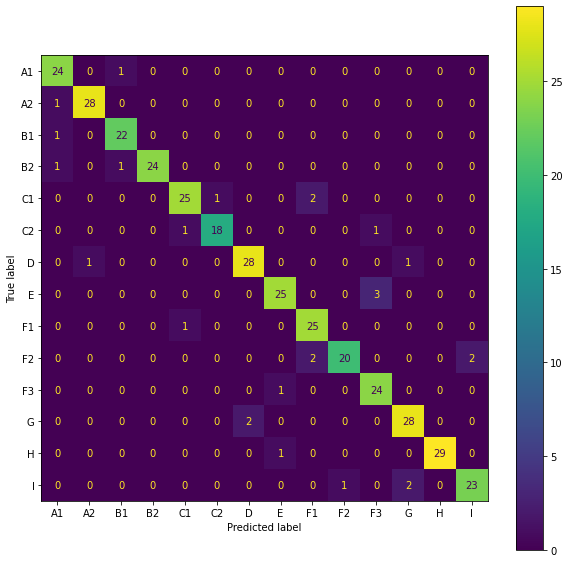

              precision    recall  f1-score   support

          A1       0.89      0.96      0.92        25
          A2       0.97      0.97      0.97        29
          B1       0.92      0.96      0.94        23
          B2       1.00      0.92      0.96        26
          C1       0.93      0.89      0.91        28
          C2       0.95      0.90      0.92        20
           D       0.93      0.93      0.93        30
           E       0.93      0.89      0.91        28
          F1       0.86      0.96      0.91        26
          F2       0.95      0.83      0.89        24
          F3       0.86      0.96      0.91        25
           G       0.90      0.93      0.92        30
           H       1.00      0.97      0.98        30
           I       0.92      0.88      0.90        26

    accuracy                           0.93       370
   macro avg       0.93      0.93      0.93       370
weighted avg       0.93      0.93      0.93       370



In [49]:
y_pred = cross_val_predict(clf.best_estimator_, attri, target, n_jobs=-1,cv=8)
conf_mat = confusion_matrix(target, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_mat,
    display_labels=clf.classes_
)
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
disp.plot(ax=ax)
plt.show()
print(classification_report(target, y_pred))

In [50]:
from sklearn.metrics import precision_recall_fscore_support
res = []
for l in clf.classes_:
    prec,recall,_,_ = precision_recall_fscore_support(np.array(target)==l,
                                                      np.array(y_pred)==l,
                                                      pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])
    
sen_spe_df = pd.DataFrame(res,columns = ['class','specificity','sensitivity'])
sen_spe_df

,class,specificity,sensitivity
0,A1,0.991304,0.960000
1,A2,0.997067,0.965517
2,B1,0.994236,0.956522
3,B2,1.000000,0.923077
4,C1,0.994152,0.892857
5,C2,0.997143,0.900000
6,D,0.994118,0.933333
7,E,0.994152,0.892857
8,F1,0.988372,0.961538
9,F2,0.997110,0.833333


In [51]:
# specificity = tn/(tn+fp)
sen_spe_df['specificity'].mean()

0.9943873528091948

In [52]:
# sensitivity TP/(TP+FN)
sen_spe_df['sensitivity'].mean()

0.9259750501515336